In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
eta = 0.8
kappa = 0.01
epsilon = 1e-6
mu = 0.006
phimin = 0.07
phimax = 0.15
#phimin = 0.015

In [3]:
phi_0 = 0.1
r = 0.006
y  = 0.005
u_0 =   1/(1-eta)
v_0 = (1-phi_0*u_0)*(1+eta*u_0)

In [4]:
phi02=0.108
u02 = 4.6
v02 = (1-phi02*u02)*(1+eta*u02)
v02

2.354976

In [6]:
from scipy.integrate import solve_ivp

def F(t,x):
    #phimin = eta*(1-eta)/(1+eta) 
    phimax = 1-eta 
    du = 1/kappa*(x[0]*(1-x[2]*x[0])-(x[0]*x[1])/(1+eta*x[0]))
    dv = (x[0]*x[1])/(1+eta*x[0]) -x[1]
    if x[2] <= phimin or x[2] >= phimax:
        dphi = 0
    else:
        dphi = r
    return [du,dv,dphi]

def F2(t,x):
    #phimin = eta*(1-eta)/(1+eta) 
    phimax = 1-eta 
    du = 1/kappa*(x[0]*(1-x[2]*x[0])-(x[0]*x[1])/(1+eta*x[0]))
    dv = (x[0]*x[1])/(1+eta*x[0]) -x[1]
    if x[2] <= phimin or x[2] >= phimax:
        dphi = 0
    else:
        dphi = y
    return [du,dv,dphi]


sol = solve_ivp(F, [0, 2], [u_0,v_0,phi_0],method='BDF',atol=1e-10,rtol=1e-8)
sol2 = solve_ivp(F, [0, 10], [u02,v02,phi02],method='BDF',atol=1e-10,rtol=1e-8)

sol4 = solve_ivp(F, [0, 100], [3,3,phimin],method='BDF',atol=1e-10,rtol=1e-10)


In [7]:
u_star = (eta-1-mu+np.sqrt((1-eta+mu)**2+8*eta*mu))/(4*eta*mu)
phi_star = eta/(1+2*eta*u_star)

In [8]:
def v(x,y):
    return (1+eta*x)*(1-y*x)

In [10]:
J = np.array([[(1-eta+phi_star+mu)+2*u_star*(eta*phi_star-phi_star+eta*mu),-u_star**2+eta*u_star**2+u_star],[-2*eta*phi_star*mu,-2*eta*mu*(1/(2*eta)+u_star)]],dtype=float)
eigs = np.linalg.eig(J)
m = eigs[1][0][1]/eigs[1][1][1]
m_2 = eigs[1][0][0]/eigs[1][1][0]
#u_vals = np.linspace(-3,3,510)+u
phi_vals_2 = np.linspace(phimin,phimax,510)

u_vals_1 =  u_star + m*(phi_vals_2-phi_star)
u_vals_2 = u_star + m_2*(phi_vals_2-phi_star)
#phi_vals_1 = phi + m*(u_vals-u)

In [13]:
V_LINE_1 = np.zeros(len(u_vals_1))
V_LINE_2 = np.zeros(len(u_vals_1))
for i in range(len(V_LINE_1)):
    V_LINE_1[i] = v(u_vals_1[i],phi_vals_2[i])
    V_LINE_2[i] = v(u_vals_2[i],phi_vals_2[i])

In [14]:
def G(t,x):
    dx = x[0]*(1-x[1]*x[0])+mu*x[0]*(1+eta*x[0])-(1-x[1]*x[0])*(1+eta*x[0])
    dphi = 2*x[1]*eta*((eta-x[1])/(2*eta*x[1])-x[0])*mu
    return [-dx,-dphi]

def G_2(t,x):
    dx = x[0]*(1-x[1]*x[0])+mu*x[0]*(1+eta*x[0])-(1-x[1]*x[0])*(1+eta*x[0])
    dphi = 2*x[1]*eta*((eta-x[1])/(2*eta*x[1])-x[0])*mu
    return [dx,dphi]

In [15]:
x_vals = np.linspace(u_star-1,u_star+1,7)
phi_vals = np.linspace(0.05,0.15,7)
x_f_vals = (eta-phi_vals)/(2*eta*phi_vals)

In [16]:
from scipy.integrate import solve_ivp

sols = np.zeros([36,2,101])
sols_2 = np.zeros([36,2,101])
t = np.linspace(0,10,101)
t2 = np.linspace(0,12,101)
for i in range(6):
    for j in range(6):
        sols[6*i+j]= solve_ivp(G, [0, 10], [x_vals[i],phi_vals[j]],t_eval=t,method='BDF',atol=1e-10,rtol=1e-8).y
        sols_2[6*i+j]= solve_ivp(G_2, [0, 12], [x_vals[i],phi_vals[j]],t_eval=t2,method='BDF',atol=1e-10,rtol=1e-8).y

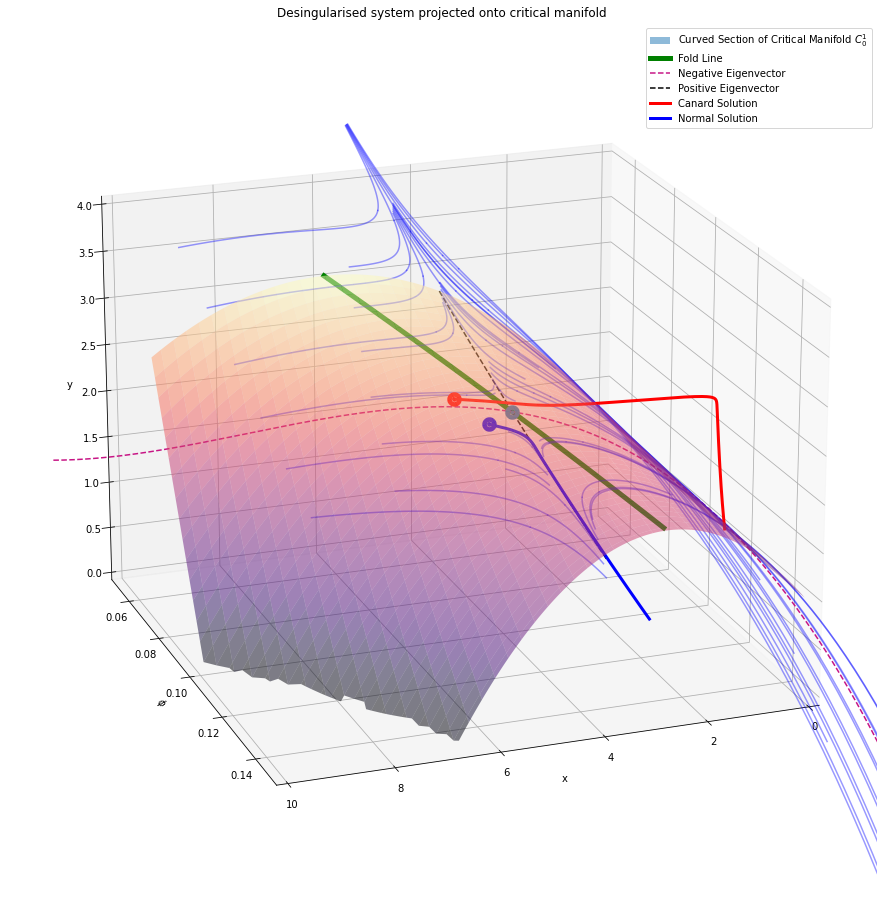

In [17]:
from matplotlib import cm
fig = plt.figure(figsize = (20,16))
ax2 = fig.add_subplot(111,projection='3d')

#phimin = 0.05

point = ax2.scatter(u_star,phi_star,v(u_star,phi_star),linewidth=10)
u = np.arange(0,10,0.125/2)
phi  = np.arange(phimin,phimax,0.001)
U, PHI = np.meshgrid(u,phi)
V = (1-PHI*U)*(1+eta*U)
V_max = np.where(V<0,None,V)
surf = ax2.plot_surface(U,PHI,V_max, cmap=cm.magma,linewidth=0, antialiased=True,alpha=0.5,label="Critical_Manifold")
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d

PHI3 = np.arange(phimin,phimax,0.002)
xline = (eta-PHI3)/(2*eta*PHI3)
zline = (eta+PHI3)**2/(4*eta*PHI3)

Fold_2, = ax2.plot3D(xline,PHI3,zline,color='g',linewidth = 5)
LINE1, = ax2.plot3D(u_vals_1,phi_vals_2,v(u_vals_1,phi_vals_2),'k--')
LINE2, = ax2.plot3D(u_vals_2,phi_vals_2,V_LINE_2,linestyle='--',color='mediumvioletred')

SOL1 = ax2.plot3D(sols[0][0],sols[0][1],v(sols[0][0],sols[0][1]),'b',alpha=0.4)
SOL2 = ax2.plot3D(sols[1][0],sols[1][1],v(sols[1][0],sols[1][1]),'b',alpha=0.4)
SOL3 = ax2.plot3D(sols[2][0],sols[2][1],v(sols[2][0],sols[2][1]),'b',alpha=0.4)
SOL4 = ax2.plot3D(sols[3][0],sols[3][1],v(sols[3][0],sols[3][1]),'b',alpha=0.4)
SOL5 = ax2.plot3D(sols[4][0],sols[4][1],v(sols[4][0],sols[4][1]),'b',alpha=0.4)
SOL6 = ax2.plot3D(sols[5][0],sols[5][1],v(sols[5][0],sols[5][1]),'b',alpha=0.4)
SOL7 = ax2.plot3D(sols[6][0],sols[6][1],v(sols[6][0],sols[6][1]),'b',alpha=0.4)
SOL8 = ax2.plot3D(sols[7][0],sols[7][1],v(sols[7][0],sols[7][1]),'b',alpha=0.4)
SOL9 = ax2.plot3D(sols[8][0],sols[8][1],v(sols[8][0],sols[8][1]),'b',alpha=0.4)
SOL10 = ax2.plot3D(sols[9][0],sols[9][1],v(sols[9][0],sols[9][1]),'b',alpha=0.4)
SOL11 = ax2.plot3D(sols[10][0],sols[10][1],v(sols[10][0],sols[10][1]),'b',alpha=0.4)
SOL12 = ax2.plot3D(sols[11][0],sols[11][1],v(sols[11][0],sols[11][1]),'b',alpha=0.4)
SOL13 = ax2.plot3D(sols[12][0],sols[12][1],v(sols[12][0],sols[12][1]),'b',alpha=0.4)
SOL14= ax2.plot3D(sols[13][0],sols[13][1],v(sols[13][0],sols[13][1]),'b',alpha=0.4)
SOL15 = ax2.plot3D(sols[14][0],sols[14][1],v(sols[14][0],sols[14][1]),'b',alpha=0.4)
SOL16 = ax2.plot3D(sols[15][0],sols[15][1],v(sols[15][0],sols[15][1]),'b',alpha=0.4)
SOL17 = ax2.plot3D(sols[16][0],sols[16][1],v(sols[16][0],sols[16][1]),'b',alpha=0.4)
SOL18 = ax2.plot3D(sols[17][0],sols[17][1],v(sols[17][0],sols[17][1]),'b',alpha=0.4)
SOL19 = ax2.plot3D(sols[18][0],sols[18][1],v(sols[18][0],sols[18][1]),'b',alpha=0.4)
SOL20 = ax2.plot3D(sols[19][0],sols[19][1],v(sols[19][0],sols[19][1]),'b',alpha=0.4)
SOL21 = ax2.plot3D(sols[20][0],sols[20][1],v(sols[20][0],sols[20][1]),'b',alpha=0.4)
SOL22 = ax2.plot3D(sols[21][0],sols[21][1],v(sols[21][0],sols[21][1]),'b',alpha=0.4)
SOL23 = ax2.plot3D(sols[22][0],sols[22][1],v(sols[22][0],sols[22][1]),'b',alpha=0.4)
SOL24 = ax2.plot3D(sols[23][0],sols[23][1],v(sols[23][0],sols[23][1]),'b',alpha=0.4)
SOL25 = ax2.plot3D(sols[24][0],sols[24][1],v(sols[24][0],sols[24][1]),'b',alpha=0.4)
SOL26 = ax2.plot3D(sols[25][0],sols[25][1],v(sols[25][0],sols[25][1]),'b',alpha=0.4)
SOL27= ax2.plot3D(sols[26][0],sols[26][1],v(sols[26][0],sols[26][1]),'b',alpha=0.4)
SOL28 = ax2.plot3D(sols[27][0],sols[27][1],v(sols[27][0],sols[27][1]),'b',alpha=0.4)
SOL29 = ax2.plot3D(sols[28][0],sols[28][1],v(sols[28][0],sols[28][1]),'b',alpha=0.4)
SOL30 = ax2.plot3D(sols[29][0],sols[29][1],v(sols[29][0],sols[29][1]),'b',alpha=0.4)
SOL31 = ax2.plot3D(sols[30][0],sols[30][1],v(sols[30][0],sols[30][1]),'b',alpha=0.4)
SOL32 = ax2.plot3D(sols[31][0],sols[31][1],v(sols[31][0],sols[31][1]),'b',alpha=0.4)
SOL33 = ax2.plot3D(sols[32][0],sols[32][1],v(sols[32][0],sols[32][1]),'b',alpha=0.4)
SOL34 = ax2.plot3D(sols[33][0],sols[33][1],v(sols[33][0],sols[33][1]),'b',alpha=0.4)
SOL35 = ax2.plot3D(sols[34][0],sols[34][1],v(sols[34][0],sols[34][1]),'b',alpha=0.4)
SOL36 = ax2.plot3D(sols[35][0],sols[35][1],v(sols[35][0],sols[35][1]),'b',alpha=0.4)


SOL1_2 = ax2.plot3D(sols_2[0][0],sols_2[0][1],v(sols_2[0][0],sols_2[0][1]),'b',alpha=0.4)
SOL2_2 = ax2.plot3D(sols_2[1][0],sols_2[1][1],v(sols_2[1][0],sols_2[1][1]),'b',alpha=0.4)
SOL3_2 = ax2.plot3D(sols_2[2][0],sols_2[2][1],v(sols_2[2][0],sols_2[2][1]),'b',alpha=0.4)
SOL4_2 = ax2.plot3D(sols_2[3][0],sols_2[3][1],v(sols_2[3][0],sols_2[3][1]),'b',alpha=0.4)
SOL5_2 = ax2.plot3D(sols_2[4][0],sols_2[4][1],v(sols_2[4][0],sols_2[4][1]),'b',alpha=0.4)
SOL6_2 = ax2.plot3D(sols_2[5][0],sols_2[5][1],v(sols_2[5][0],sols_2[5][1]),'b',alpha=0.4)
SOL7_2 = ax2.plot3D(sols_2[6][0],sols_2[6][1],v(sols_2[6][0],sols_2[6][1]),'b',alpha=0.4)
SOL8_2 = ax2.plot3D(sols_2[7][0],sols_2[7][1],v(sols_2[7][0],sols_2[7][1]),'b',alpha=0.4)
SOL9_2 = ax2.plot3D(sols_2[8][0],sols_2[8][1],v(sols_2[8][0],sols_2[8][1]),'b',alpha=0.4)
SOL10_2 = ax2.plot3D(sols_2[9][0],sols_2[9][1],v(sols_2[9][0],sols_2[9][1]),'b',alpha=0.4)
SOL11_2 = ax2.plot3D(sols_2[10][0],sols_2[10][1],v(sols_2[10][0],sols_2[10][1]),'b',alpha=0.4)
SOL12_2 = ax2.plot3D(sols_2[11][0],sols_2[11][1],v(sols_2[11][0],sols_2[11][1]),'b',alpha=0.4)
SOL13_2 = ax2.plot3D(sols_2[12][0],sols_2[12][1],v(sols_2[12][0],sols_2[12][1]),'b',alpha=0.4)
SOL14_2 = ax2.plot3D(sols_2[13][0],sols_2[13][1],v(sols_2[13][0],sols_2[13][1]),'b',alpha=0.4)
SOL15_2 = ax2.plot3D(sols_2[14][0],sols_2[14][1],v(sols_2[14][0],sols_2[14][1]),'b',alpha=0.4)
SOL16_2 = ax2.plot3D(sols_2[15][0],sols_2[15][1],v(sols_2[15][0],sols_2[15][1]),'b',alpha=0.4)
SOL17_2 = ax2.plot3D(sols_2[16][0],sols_2[16][1],v(sols_2[16][0],sols_2[16][1]),'b',alpha=0.4)
SOL18_2 = ax2.plot3D(sols_2[17][0],sols_2[17][1],v(sols_2[17][0],sols_2[17][1]),'b',alpha=0.4)
SOL19_2 = ax2.plot3D(sols_2[18][0],sols_2[18][1],v(sols_2[18][0],sols_2[18][1]),'b',alpha=0.4)
SOL20_2 = ax2.plot3D(sols_2[19][0],sols_2[19][1],v(sols_2[19][0],sols_2[19][1]),'b',alpha=0.4)
SOL21_2 = ax2.plot3D(sols_2[20][0],sols_2[20][1],v(sols_2[20][0],sols_2[20][1]),'b',alpha=0.4)
SOL22_2 = ax2.plot3D(sols_2[21][0],sols_2[21][1],v(sols_2[21][0],sols_2[21][1]),'b',alpha=0.4)
SOL23_2 = ax2.plot3D(sols_2[22][0],sols_2[22][1],v(sols_2[22][0],sols_2[22][1]),'b',alpha=0.4)
SOL24_2 = ax2.plot3D(sols_2[23][0],sols_2[23][1],v(sols_2[23][0],sols_2[23][1]),'b',alpha=0.4)
SOL25_2 = ax2.plot3D(sols_2[24][0],sols_2[24][1],v(sols_2[24][0],sols_2[24][1]),'b',alpha=0.4)
SOL26_2 = ax2.plot3D(sols_2[25][0],sols_2[25][1],v(sols_2[25][0],sols_2[25][1]),'b',alpha=0.4)
SOL27_2 = ax2.plot3D(sols_2[26][0],sols_2[26][1],v(sols_2[26][0],sols_2[26][1]),'b',alpha=0.4)
SOL28_2 = ax2.plot3D(sols_2[27][0],sols_2[27][1],v(sols_2[27][0],sols_2[27][1]),'b',alpha=0.4)
SOL29_2 = ax2.plot3D(sols_2[28][0],sols_2[28][1],v(sols_2[28][0],sols_2[28][1]),'b',alpha=0.4)
SOL30_2 = ax2.plot3D(sols_2[29][0],sols_2[29][1],v(sols_2[29][0],sols_2[29][1]),'b',alpha=0.4)
SOL31_2 = ax2.plot3D(sols_2[30][0],sols_2[30][1],v(sols_2[30][0],sols_2[30][1]),'b',alpha=0.4)
SOL32_2 = ax2.plot3D(sols_2[31][0],sols_2[31][1],v(sols_2[31][0],sols_2[31][1]),'b',alpha=0.4)
SOL33_2 = ax2.plot3D(sols_2[32][0],sols_2[32][1],v(sols_2[32][0],sols_2[32][1]),'b',alpha=0.4)
SOL34_2 = ax2.plot3D(sols_2[33][0],sols_2[33][1],v(sols_2[33][0],sols_2[33][1]),'b',alpha=0.4)
SOL35_2 = ax2.plot3D(sols_2[34][0],sols_2[34][1],v(sols_2[34][0],sols_2[34][1]),'b',alpha=0.4)
SOL36_2 = ax2.plot3D(sols_2[35][0],sols_2[35][1],v(sols_2[35][0],sols_2[35][1]),'b',alpha=0.4)

CANARD_SOL, = ax2.plot3D(sol.y[0],sol.y[2],sol.y[1],color='r',linewidth=3)
NORMAL_SOL, = ax2.plot3D(sol2.y[0],sol2.y[2],sol2.y[1],color='b',linewidth=3)
ax2.scatter3D(u_0,phi_0,v_0,linewidth=10,label="IC Canard",color='r')
ax2.scatter3D(u02,phi02,v02,linewidth=10,label="IC Normal",color='b')
plt.legend([surf,Fold_2,LINE2,LINE1,CANARD_SOL,NORMAL_SOL],["Curved Section of Critical Manifold $C_0^1$","Fold Line","Negative Eigenvector","Positive Eigenvector","Canard Solution","Normal Solution"])
ax2.set_xlim([0,10])
ax2.set_ylim([0.05,0.15])
ax2.set_zlim([0,4])
ax2.set_title("Desingularised system projected onto critical manifold")
ax2.set_xlabel("x")
ax2.set_ylabel("$\phi$")
ax2.set_zlabel("y")
ax2.view_init(elev=20, azim=70)
#plt.savefig("3D Separatrix")